## Лабораторна робота 3. Побудова автокодувальника
### Завдання 1.1
### Блінди Ірини ФІТ 4-4

Розробити звичайний автокодувальник для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Завантаження датасету MNIST
(mnist_train_images, _), (mnist_test_images, _) = tf.keras.datasets.mnist.load_data()

# Нормалізація та підготовка даних
mnist_train_images = mnist_train_images.astype('float32') / 255.
mnist_test_images = mnist_test_images.astype('float32') / 255.
mnist_train_images = np.reshape(mnist_train_images, (len(mnist_train_images), 28, 28, 1))
mnist_test_images = np.reshape(mnist_test_images, (len(mnist_test_images), 28, 28, 1))

In [3]:
# Параметри мережі
input_shape = (28, 28, 1) # Розмір вхідного зображення
encoding_dim = 64  # розмір кодованого представлення

In [4]:
# Визначення моделі автокодувальника
input_img = tf.keras.layers.Input(shape=input_shape)
# Енкодер
x = tf.keras.layers.Flatten()(input_img)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(x)
# Декодер
x = tf.keras.layers.Dense(np.prod(input_shape), activation='sigmoid')(encoded)
decoded = tf.keras.layers.Reshape(input_shape)(x)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Навчання автокодувальника
history = autoencoder.fit(mnist_train_images, mnist_train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_test_images, mnist_test_images))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3496 - val_loss: 0.1624
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1523 - val_loss: 0.1251
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1220 - val_loss: 0.1076
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1061 - val_loss: 0.0969
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0963 - val_loss: 0.0898
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0897 - val_loss: 0.0849
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0850 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0818 - val_loss: 0.0791
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0796 - val_loss: 0.0775
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0782 - val_loss: 0.0762
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0770 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

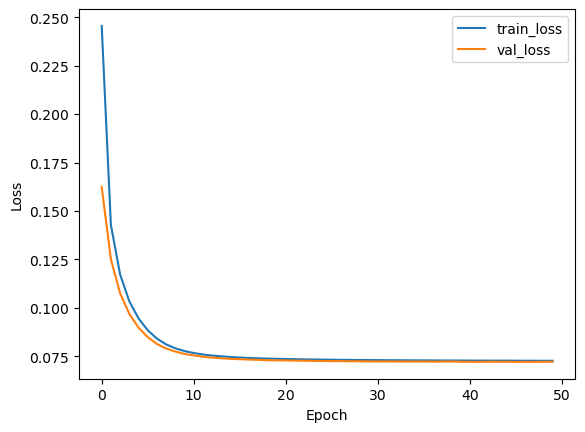

In [6]:
# Графік функції втрат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


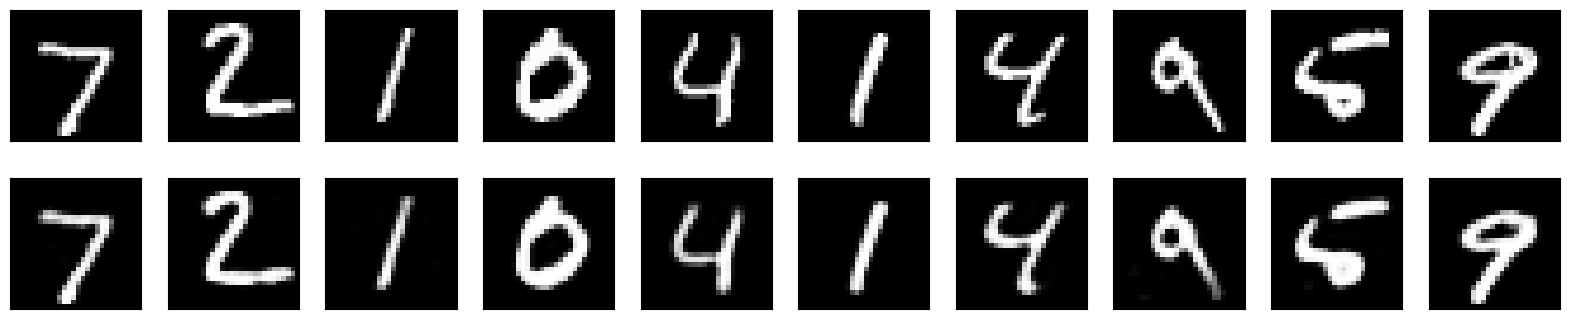

In [7]:
# Візуалізація результатів
decoded_imgs = autoencoder.predict(mnist_test_images)

n = 10  # кількість зображень, які будуть відображені
plt.figure(figsize=(20, 4))
for i in range(n):
    # Відображення оригінальних зображень
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відображення відновлених зображень
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Висновок
У даній роботі був розроблений автоенкодер для набору даних рукописних цифр MNIST за допомогою багатошарової нейронної мережі в TensorFlow. Архітектура моделі автоенкодера включала один прихований шар для кодування та декодування. Для кодування використовувалася функція активації ReLU, а для декодування - sigmoid.

Після навчання моделі протягом 50 епох були побудовані графіки функції втрат. Результати показали, що автоенкодер успішно відновлює рукописні цифри з набору даних MNIST. Візуалізація оригінальних та відновлених зображень підтвердила успішність роботи моделі.

Узагальнюючи, розроблений автоенкодер є ефективним інструментом для автоматичного відновлення рукописних цифр, що може знайти застосування у різноманітних завданнях обробки зображень та комп'ютерного зору.